<a href="https://colab.research.google.com/github/matheusvanzan/ime-machine-learning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook baseado no seguinte artigo do Kaggle

https://www.kaggle.com/code/kareem3egm/learn-machine-learning-faster-1/notebook#Linear-Regression

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

GITHUB_ROOT = 'https://raw.githubusercontent.com/matheusvanzan/ime-machine-learning/master/'

In [56]:
data = pd.read_csv(GITHUB_ROOT + 'accidental-deaths-in-usa-monthly.csv')

data = data.dropna() # drop NULL values
data.insert(loc = 0, column = 'index', value = data.index)
data.head()

,index,Month,Deaths
0,0,1973-01,9007
1,1,1973-02,8106
2,2,1973-03,8928
3,3,1973-04,9137
4,4,1973-05,10017


In [72]:
test = data.sample(frac=0.3, axis=0)
train = data.drop(index=test.index)

test = test.sort_values(by=['index'])
test.head()

,index,Month,Deaths
2,2,1973-03,8928
8,8,1973-09,9713
9,9,1973-10,9938
11,11,1973-12,8927
12,12,1974-01,7750


In [73]:
# train = train.sort_values(by=['index'])
train.head()

,index,Month,Deaths
0,0,1973-01,9007
1,1,1973-02,8106
3,3,1973-04,9137
4,4,1973-05,10017
5,5,1973-06,10826


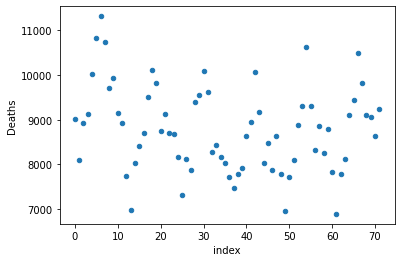

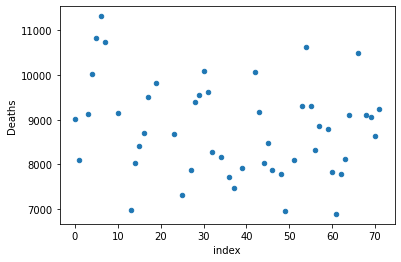

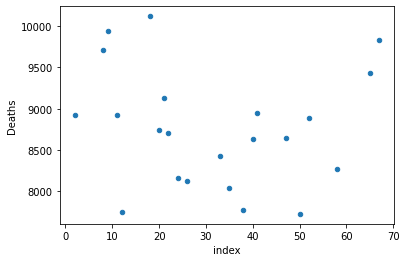

In [74]:
data.plot.scatter(x='index', y='Deaths')
train.plot.scatter(x='index', y='Deaths')
test.plot.scatter(x='index', y='Deaths')

In [76]:
# X is 2D array
# y is 1D array

X_train = np.array(train.iloc[:, 0:1].values) # iloc(rows, cols)
y_train = np.array(train.iloc[:, 2].values)

X_test = np.array(test.iloc[:, 0:1].values)
y_test = np.array(test.iloc[:, 2].values)

model = LinearRegression(
    fit_intercept=True, 
    # normalize=True, 
    copy_X=True, 
    n_jobs=-1
)

# create model based on train
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

# plt.plot(X_train, model.predict(X_train), color='green')
# plt.show()
# print(X_train)
# print(y_train)

# print(X_test)
# print(y_test)

print(y_test)
print(y_pred)

print(accuracy)

[ 8928  9713  9938  8927  7750 10120  8743  9129  8710  8162  8124  8433
  8034  7776  8634  8945  8647  7726  8890  8265  9434  9827]
[9156.57019758 9095.21615132 9084.99047694 9064.53912819 9054.31345382
 8992.95940756 8972.50805881 8962.28238443 8952.05671005 8931.6053613
 8911.15401255 8839.57429192 8819.12294316 8788.44592004 8767.99457128
 8757.76889691 8696.41485065 8665.73782752 8645.28647877 8583.93243251
 8512.35271188 8491.90136313]
-0.030885174425481
